### Individual Homework

#### Enter your name here: David Szabó-Zsiga

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Analysis of movies IMDB dataset**

We will look at a ***subset*** sample of movies, taken from the [Kaggle IMDB 5000 movie dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

In [16]:
movies = pd.read_csv('../Data/movies.csv')
movies

,title,genre,director,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
0,Avatar,Action,James Cameron,2009,178,760505847,237000000,4834,886204,3777,7.9
1,Titanic,Drama,James Cameron,1997,194,658672302,200000000,45223,793059,2843,7.7
2,Jurassic World,Action,Colin Trevorrow,2015,124,652177271,150000000,8458,418214,1934,7.0
3,The Avengers,Action,Joss Whedon,2012,173,623279547,220000000,87697,995415,2425,8.1
4,The Dark Knight,Action,Christopher Nolan,2008,152,533316061,185000000,57802,1676169,5312,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2956,Locker 13,Thriller,Bruce Dellis,2014,95,2468,300000,2048,241,15,4.8
2957,The Ghastly Love of Johnny X,Comedy,Paul Bunnell,2012,106,2436,2000000,1611,344,113,5.7
2958,Detention of the Dead,Comedy,Alex Craig Mann,2012,87,1332,500000,2251,2038,49,4.6
2959,The Trials of Darryl Hunt,Crime,Ricki Stern,2006,106,1111,200000,2,771,21,7.7


Besides the obvious variables of `title`, `genre`, `director`, `year`, and `duration`, the rest of the variables are as follows:

-   `gross` : The gross earnings in the US box office, not adjusted for inflation
-   `budget`: The movie's budget
-   `cast_facebook_likes`: the number of facebook likes cast memebrs received
-   `votes`: the number of people who voted for (or rated) the movie in IMDB
-   `reviews`: the number of reviews for that movie
-   `rating`: IMDB average rating

**Produce a table with the count of movies by genre, ranked in descending order**


In [17]:
genres = (
    movies
        .groupby('genre')
        .agg(count= ('title', 'count'))
        .sort_values('count', ascending= False)
        .reset_index()
)
genres

,genre,count
0,Comedy,848
1,Action,738
2,Drama,498
3,Adventure,288
4,Crime,202
5,Biography,135
6,Horror,131
7,Animation,35
8,Fantasy,28
9,Documentary,25


**Produce a table with the average gross earning and budget (`gross` and `budget`) by genre. Calculate a variable `return_on_budget` which shows how many \$ did a movie make at the box office for each \$ of its budget. Ranked genres by this `return_on_budget` in descending order**

In [18]:
profits = (
    movies
        .groupby('genre')
        .agg(
            avg_gross=('gross', 'mean'),
            avg_budget=('budget', 'mean'))
        .assign(return_on_budget=lambda x: x['avg_gross'] / x['avg_budget'])
        .sort_values('return_on_budget', ascending= False)
        .reset_index()
)
profits

,genre,avg_gross,avg_budget,return_on_budget
0,Musical,9.208400e+07,3.189500e+06,28.870983
1,Family,1.491605e+08,1.483333e+07,10.055763
2,Western,2.082188e+07,3.465000e+06,6.009202
3,Documentary,1.735397e+07,5.887852e+06,2.947420
4,Horror,3.771374e+07,1.350492e+07,2.792593
5,Fantasy,4.240884e+07,1.758214e+07,2.412040
6,Comedy,4.263055e+07,2.444632e+07,1.743843
7,Mystery,6.753302e+07,3.921875e+07,1.721958
8,Animation,9.843379e+07,6.170143e+07,1.595324
9,Biography,4.520181e+07,2.854370e+07,1.583600


**Produce a table that shows the top 15 directors who have created the highest gross revenue in the box office. Don't just show the total gross amount, but also the mean, median, and standard deviation per director**

In [19]:
top_directors = (
    movies
        .groupby('director')
        .agg(
            sum_gross=('gross', 'sum'),
            mean_gross=('gross', 'mean'),
            median_gross=('gross', 'median'),
            std_gross=('gross', 'std')
        )
        .sort_values('sum_gross', ascending=False)
        .reset_index()
)
top_directors

,director,sum_gross,mean_gross,median_gross,std_gross
0,Steven Spielberg,4014061704,1.745244e+08,164435221.0,1.014211e+08
1,Michael Bay,2231242537,1.716340e+08,138396624.0,1.271616e+08
2,Tim Burton,2071275480,1.294547e+08,76519172.0,1.087269e+08
3,Sam Raimi,2014600898,2.014601e+08,234903076.0,1.621266e+08
4,James Cameron,1909725910,3.182877e+08,175562880.5,3.091713e+08
...,...,...,...,...,...
1361,Bruce Dellis,2468,2.468000e+03,2468.0,NaN
1362,Paul Bunnell,2436,2.436000e+03,2436.0,NaN
1363,Alex Craig Mann,1332,1.332000e+03,1332.0,NaN
1364,Ricki Stern,1111,1.111000e+03,1111.0,NaN


**Produce a table that describes how ratings are distributed by genre. We don't want just the mean, but also, min, max, median, SD and some kind of a histogram or density graph that visually shows how ratings are distributed.**

In [20]:
ratings = (
    movies
        .groupby('genre')
        .agg(
            avg_rating=('rating', 'mean'),
            min_rating=('rating', 'min'),
            max_rating=('rating', 'max'),
            median_rating=('rating', 'median'),
            std_rating=('rating', 'std')
        )
        .reset_index()
)
ratings


,genre,avg_rating,min_rating,max_rating,median_rating,std_rating
0,Action,6.232249,2.1,9.0,6.30,1.030362
1,Adventure,6.506597,2.3,8.6,6.60,1.093881
2,Animation,6.651429,4.5,8.0,6.90,0.968131
3,Biography,7.114074,4.5,8.9,7.20,0.759827
4,Comedy,6.109670,1.9,8.8,6.20,1.023075
5,Crime,6.915347,4.8,9.3,6.90,0.849356
6,Documentary,6.660000,1.6,8.5,7.40,1.766588
7,Drama,6.731526,2.1,8.8,6.80,0.916993
8,Family,6.500000,5.7,7.9,5.90,1.216553
9,Fantasy,6.153571,4.3,7.9,6.45,0.958966


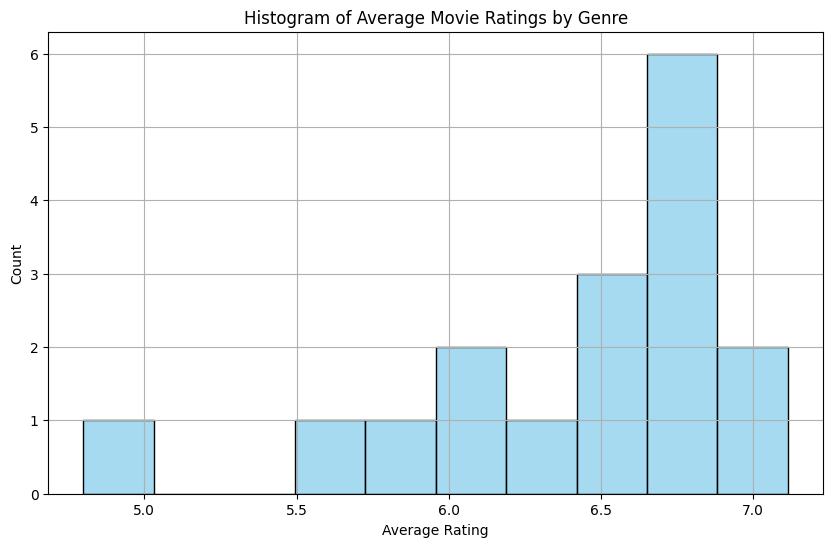

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ratings, x='avg_rating', bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Average Movie Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Challenge - Produce a table of your own choosing, something you think is important/interesting to have data for, justify your result by writting a 2 sentence explanation/interpretation of the result.**

In [22]:
# Create rating categories
movies['rating_category'] = pd.qcut(movies['rating'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Calculate ROI and other metrics by rating category
investment_analysis = (
    movies
    .assign(roi=lambda x: (x['gross'] - x['budget']) / x['budget'])
    .groupby('rating_category')
    .agg(
        avg_roi=('roi', 'mean'),
        median_roi=('roi', 'median'),
        success_rate=('roi', lambda x: (x > 0).mean()),  # Proportion of profitable movies
        avg_budget=('budget', 'mean'),
        avg_gross=('gross', 'mean'),
        movie_count=('title', 'count')
    )
    .round(2)
    .sort_values('avg_roi', ascending=False)
    .reset_index()
)

# Convert ratios to percentages for better readability
investment_analysis['success_rate'] = (investment_analysis['success_rate'] * 100).round(1)
investment_analysis['avg_roi'] = (investment_analysis['avg_roi'] * 100).round(1)
investment_analysis['median_roi'] = (investment_analysis['median_roi'] * 100).round(1)

investment_analysis

/var/folders/k1/jj9fhjr53_3c3hqdrtj38mym0000gn/T/ipykernel_3509/2503365524.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('rating_category')


,rating_category,avg_roi,median_roi,success_rate,avg_budget,avg_gross,movie_count
0,Medium,1321.0,6.0,52.0,42105082.58,51583946.93,775
1,Very High,919.0,96.0,78.0,42153513.16,88524457.29,696
2,High,293.0,25.0,60.0,41676053.08,58110883.29,698
3,Low,107.0,-14.0,44.0,36886145.20,37694064.89,792


This table provides a comprehensive analysis of movie financial performance across different rating categories.

Movies are divided into four groups based on their IMDB ratings (Low, Medium, High, Very High)

   - Higher-rated movies tend to show better financial performance
   - The success rate increases with rating category
   - This suggests that investing in quality films (based on ratings) tends to be less risky
   - There's a clear correlation between movie quality and financial success

#### Use visualisation to answer the following questions

**Examine the relationship between `gross` and `cast_facebook_likes`. Produce a scatterplot and write one sentence discussing whether the number of facebook likes that the cast has received is likely to be a good predictor of how much money a movie will make at the box office. What variable are you going to map to the Y- and X- axes?**

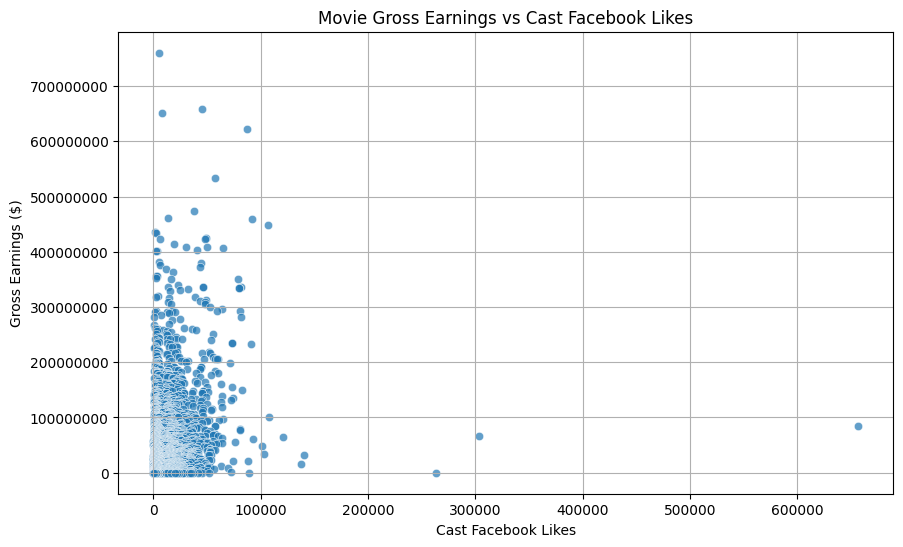

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='cast_facebook_likes', y='gross', alpha=0.7)
plt.title('Movie Gross Earnings vs Cast Facebook Likes')
plt.xlabel('Cast Facebook Likes')
plt.ylabel('Gross Earnings ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

While there is a slight positive trend, the relationship between cast Facebook likes and gross earnings shows high variability and many outliers, suggesting that cast Facebook likes alone may not be a reliable predictor of box office success.

**Examine the relationship between `gross` and `budget`. Produce a scatterplot and write one sentence discussing whether budget is likely to be a good predictor of how much money a movie will make at the box office.**

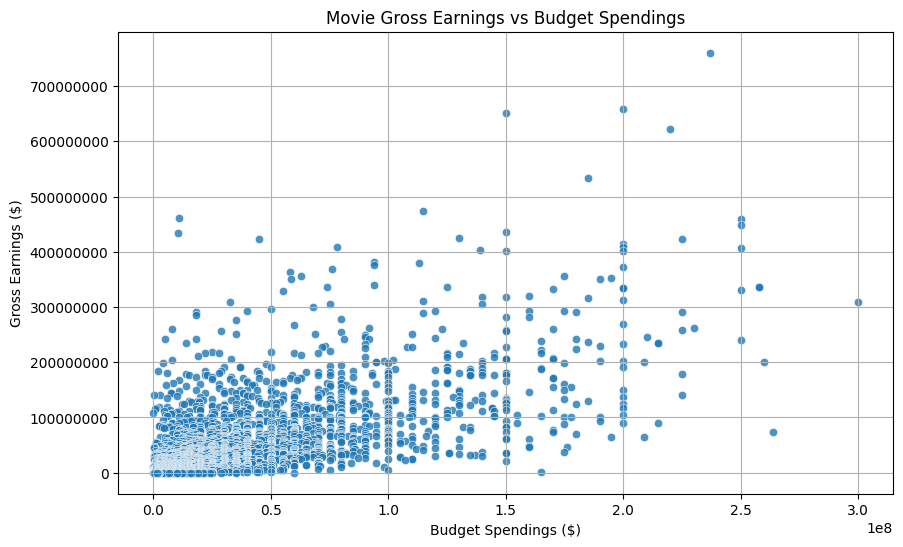

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='budget', y='gross', alpha= 0.8)
plt.title('Movie Gross Earnings vs Budget Spendings')
plt.xlabel('Budget Spendings ($)')
plt.ylabel('Gross Earnings ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

The strong positive correlation between movie budget and gross earnings suggests that budget is a relatively good predictor of box office success, as higher-budget films tend to generate higher earnings, likely due to their ability to afford better production quality, marketing, and star talent, though there is still considerable variation in the relationship with some high-budget films underperforming and some lower-budget films becoming surprise hits.

**Examine the relationship between `gross` and `rating`. Produce a scatterplot, faceted by `genre` and discuss whether IMDB ratings are likely to be a good predictor of how much money a movie will make at the box office. Is there anything strange in this dataset?**

<Figure size 1500x1000 with 0 Axes>

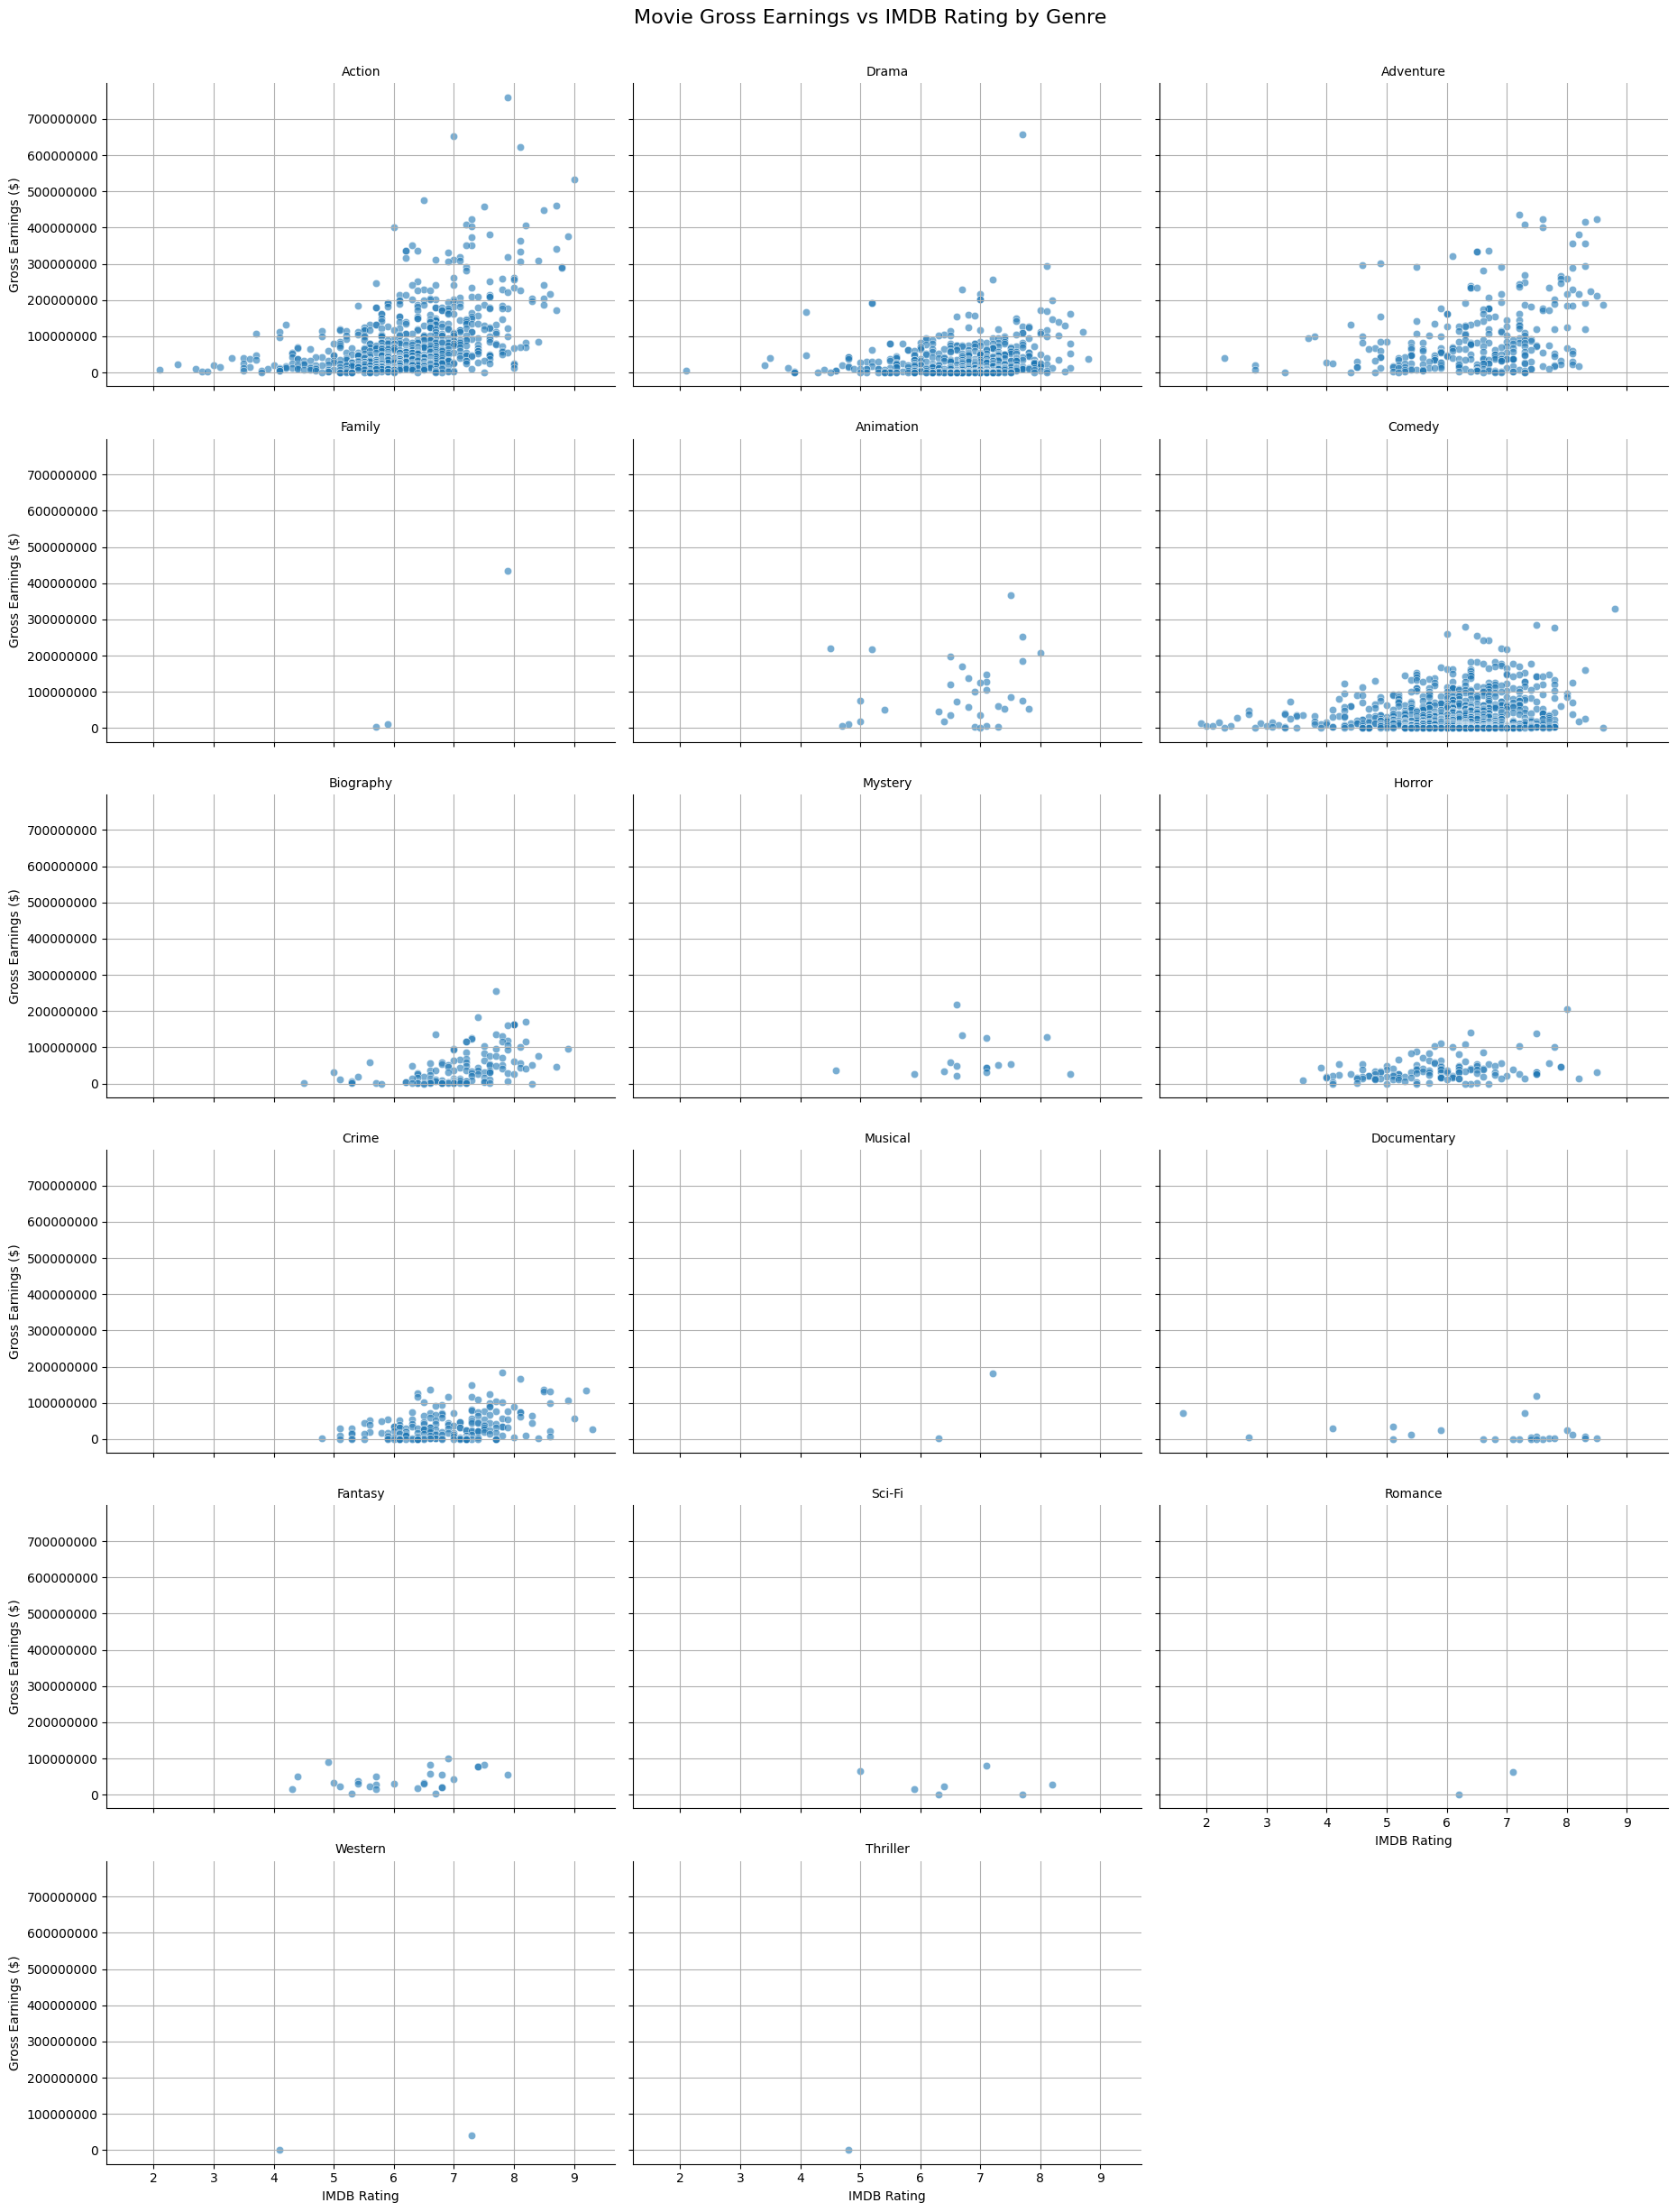

In [25]:
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(data=movies, col='genre', col_wrap=3, height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='rating', y='gross', alpha=0.6)
g.set_axis_labels('IMDB Rating', 'Gross Earnings ($)')
g.set_titles('{col_name}')
g.fig.suptitle('Movie Gross Earnings vs IMDB Rating by Genre', y=1.02, fontsize=16)

for ax in g.axes:
    ax.ticklabel_format(style='plain', axis='y')
    ax.grid(True)
plt.show()

Observations:
1. The relationship between IMDB ratings and gross earnings shows considerable variation across genres.
2. There appears to be a slight positive trend in some genres, but it's not very strong.
3. There's a notable outlier in the dataset with extremely high gross earnings.
4. Most movies cluster in the rating range of 5-8, regardless of their box office performance.

**Challenge - Produce a visualisation of your choosing, something you think is important to explore/investigate visually. Do make it a comprehensive graph and not a single histogram or density plot. Make it publication ready, label your axes, give it a title, choose colouring options, appropirately formatted text etc.**

In [26]:
# Create a pivot table for the heatmap
duration = movies.pivot_table(
    values='duration',
    index=pd.qcut(movies['year'], q=4, labels=['1990-1996', '1997-2003', '2004-2010', '2011-2016']),
    columns=pd.qcut(movies['rating'], q=4, labels=['Low', 'Medium', 'High', 'Very High']),
    aggfunc='mean'
).round(1)

duration

/var/folders/k1/jj9fhjr53_3c3hqdrtj38mym0000gn/T/ipykernel_3509/1115805121.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  duration = movies.pivot_table(


rating,Low,Medium,High,Very High
year,,,,
1990-1996,100.8,107.6,115.0,125.7
1997-2003,98.1,107.1,108.6,119.4
2004-2010,98.7,104.6,110.8,117.2
2011-2016,101.9,108.6,110.6,123.8


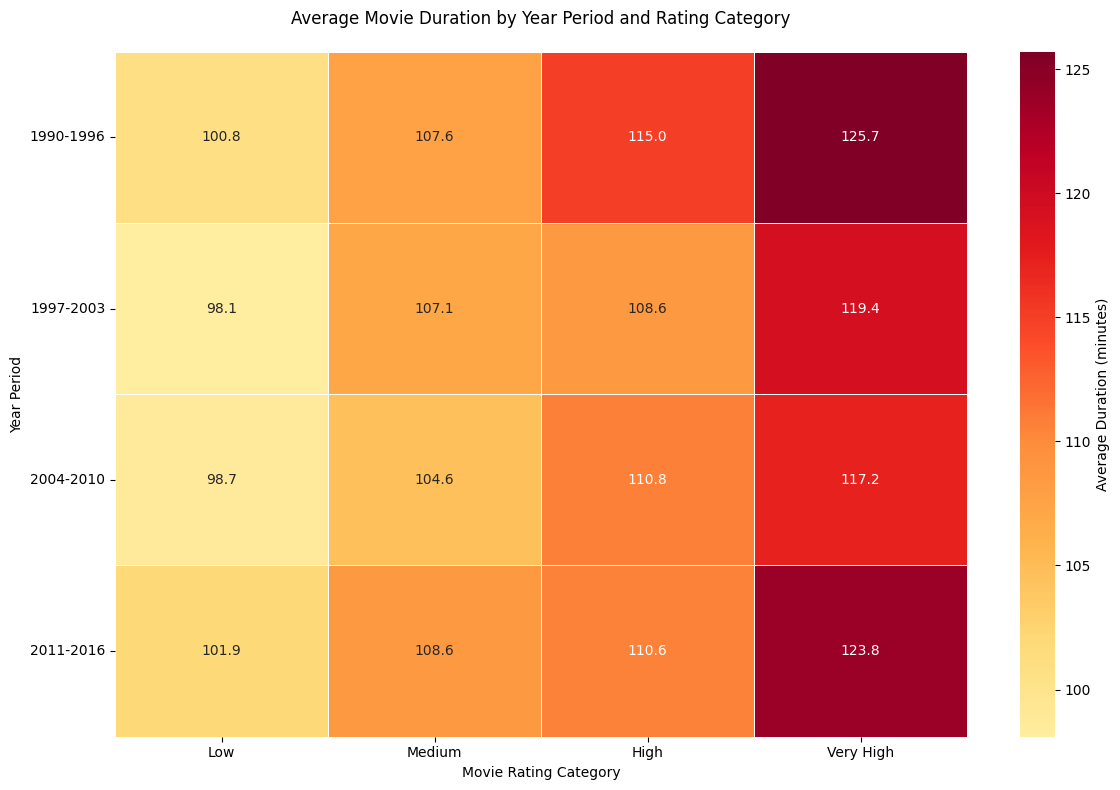

In [27]:
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    data=duration,
    annot=True,
    fmt='.1f',
    cmap='YlOrRd',
    linewidths=0.5,
    center=duration.mean().mean(),
    cbar_kws={'label': 'Average Duration (minutes)'}
)

# Customize the plot
plt.title('Average Movie Duration by Year Period and Rating Category', pad=20)
plt.xlabel('Movie Rating Category')
plt.ylabel('Year Period')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

This heatmap visualizes how movie durations have evolved over time and across different rating categories. The data reveals that higher-rated movies (High and Very High categories) tend to have longer durations across all time periods, with movies in the most recent period (2011-2016) showing particularly long running times for highly-rated films. This suggests a trend where quality films, as rated by audiences, are often given more screen time to develop their stories, while lower-rated movies tend to be shorter in duration.

### Deliverables

Poduce a clean, stand-alone notebook (or HTML export) with:

All tables/plots properly labeled

Brief interpretations where requested

Upload final HTML/Notebook.